# SOM from scratch
In this Notebook we are going to implement a Self Organizing Map model. A brief showcase of its capabilities will be then given subsequently.

### Defining The model
Before doing anything, we start by defining the model class. 

In [96]:
import numpy as np
import random
from copy import deepcopy

np.set_printoptions(precision=2)
np.random.seed(2021)

def h(x, bmu, sigma):
  # Corresponds to the squared norm (np.linalg.norm(w - bmu, axis = 1) ** 2) 
  dist = np.sum(np.subtract(x, bmu) ** 2, axis=len(x.shape)-1)
  return np.exp(-dist / 2 / sigma)

class SOM:
    def __init__(self, xdim, ydim, input_units):
      self.weights = np.random.uniform(size=(ydim, xdim, input_units))
      self.grid = np.array([[(i, j) for j in range(0, xdim)] for i in range(0, ydim)])

    def train(self, train_data, iterations, eta, sigma, eta_decay, sigma_decay):
      train_data = deepcopy(train_data)
      sigma_0 = sigma
      eta_0 = eta
      # Define both sigma(n) and eta(n)
      sigma = lambda n: sigma_0 * np.exp(-n * sigma_decay)
      eta = lambda n: eta_0 * np.exp(-n * eta_decay)

      # For each iteration we shuffle the entire dataset (so that we simulate picking an arbitrary neuron)
      for n in range(0, iterations):
        random.shuffle(train_data)
        for x_i in train_data:
          dist = np.linalg.norm(x_i - self.weights, axis = 2)
          # Get the index with the minimum value inside the distance matrix
          bmu_index = np.argmin(dist)
          # then convert it into a 2-D index (numpy returns only 1-D indexes)
          bmu_index = np.unravel_index(bmu_index, dist.shape)
          bmu = self.weights[bmu_index]
          h_vals = h(self.grid, bmu_index, sigma(n))
          #Apply the update rule for each weight
          self.weights += (eta(n) * h_vals[..., None] * (x_i - self.weights))

    def plot_data(self):
      if(self.weights.shape[2] == 2):
        xdim, ydim = self.weights.shape[0], self.weights.shape[1]
        points = self.weights.reshape(xdim * ydim, 2)
        return points[:, 0], points[:, 1]
      else:
        raise Exception('Cannot plot higher dimensional data (>2)')


### Testing the Map
In order to test the map, we are going to create a sample of 100 points from a uniform distribution and try to fit the SOM with such points. The results will then be plotted.

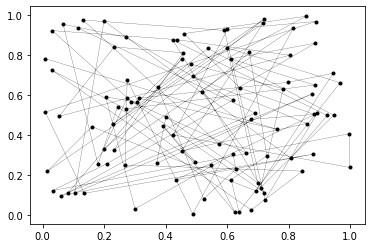

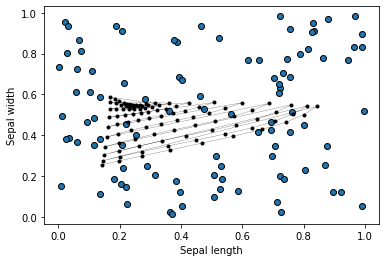

In [106]:
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True)
X = np.random.rand(100,2)

som = SOM(10, 10, 2)
neurons_x, neurons_y = som.plot_data()
plt.plot(neurons_x, neurons_y, linewidth=0.2, marker='.', color='k')
plt.show()

som.train(X, 5, eta=.5, sigma=20, eta_decay=.1, sigma_decay=.1)
neurons_x, neurons_y = som.plot_data()
# plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.scatter(X[:, 0], X[:, 1], edgecolor="k")
plt.plot(neurons_x, neurons_y, linewidth=0.2, marker='.', color='k')
# plt.scatter(neurons_x, neurons_y, s=15)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.show()